In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [4]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
type(X_train)

numpy.ndarray

In [6]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


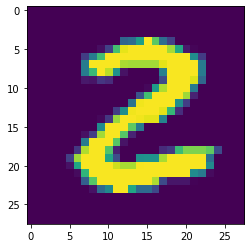

2


In [9]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [10]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [11]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [13]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [15]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3003 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1431 - accuracy: 0.9571
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1066 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0721 - accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0624 - accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.036

In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1034 - accuracy: 0.9721
0.972100019454956


In [18]:
print(X_test.shape)

(10000, 28, 28)


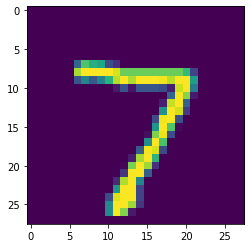

In [19]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [20]:
print(Y_test[0])

7


In [21]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [22]:
print(Y_pred.shape)

(10000, 10)


In [23]:
print(Y_pred[0])

[1.6915008e-01 3.0020170e-03 1.4188102e-01 9.3167841e-01 2.9913708e-05
 2.3181016e-04 2.0706015e-10 9.9999070e-01 6.4698958e-01 4.6808898e-01]


In [24]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [25]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [26]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [27]:
print(conf_mat)

tf.Tensor(
[[ 967    0    1    0    1    4    3    1    3    0]
 [   0 1122    1    6    0    2    2    1    1    0]
 [   3    1  997    6    2    4    5    8    6    0]
 [   1    0    4  978    0   13    1    6    2    5]
 [   1    0    3    1  962    1    1    4    0    9]
 [   2    0    0    5    1  874    4    3    1    2]
 [   6    2    0    1    5    6  938    0    0    0]
 [   2    2    5    5    4    0    0  998    6    6]
 [   6    1    1    9    7   13    2    2  925    8]
 [   0    3    0    7   19    9    1    7    3  960]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

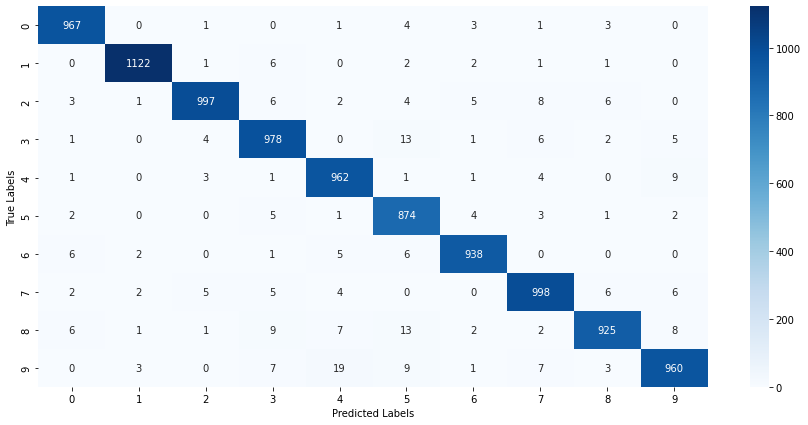

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [45]:
input_image_path = './images.webp'

input_image = cv2.imread(input_image_path)

In [46]:
type(input_image)

numpy.ndarray

In [47]:
print(input_image)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


In [48]:
input_image.shape

(1480, 1490, 3)

In [49]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [50]:
grayscale.shape

(1480, 1490)

In [51]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [52]:
input_image_resize.shape

(28, 28)

In [53]:
input_image_resize = input_image_resize/255

In [54]:
type(input_image_resize)

numpy.ndarray

In [55]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [56]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 20ms/step
[[1.6532026e-01 3.0979456e-03 1.4591613e-01 9.3096316e-01 3.2033640e-05
  2.3190057e-04 2.1909449e-10 9.9999046e-01 6.4313209e-01 4.5930874e-01]]


In [57]:
input_pred_label = np.argmax(input_prediction)

In [58]:
print(input_pred_label)

7


In [59]:
model.save("handwritten_digit_recognition.h5")